# Laboratorio 2 - Perceptrón para clasificar lirios - Práctica 1

Grupo B07

- Álvaro Ramos Morales

- Álvaro Delgado Gallego

- Fernando Ramírez Fernández

- Juan Esteban Bernal Santos

In [1]:
# Se importan las librerías necesarias para el desarrollo de la práctica
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Estudio del dataset Iris

In [2]:
# Cargamos el conjunto de datos de iris
iris = load_iris()

# Ver las primeras 5 filas de datos
print("\nPrimeras 5 filas de datos:")
print(iris.data[:5])

# Ver las etiquetas de las clases
print("\nEtiquetas de las clases:")
print(iris.target_names)

# Ver la descripción del conjunto de datos
print("\nDescripción del conjunto de datos:")
print(iris.DESCR)


Primeras 5 filas de datos:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Etiquetas de las clases:
['setosa' 'versicolor' 'virginica']

Descripción del conjunto de datos:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal

In [3]:
# Lista de hiperparámetros
learning_rate = 0.1
threshold = 0.1

In [4]:
# Definir función para entrenar el perceptrón usando la regla de Hebb
def train_perceptron(X, y, learning_rate=0.1, threshold=0.1, max_iterations=5000):
    num_samples, num_features = X.shape
    # Añadir una columna de unos para el sesgo
    X = np.hstack((np.ones((num_samples, 1)), X))
    
    # Inicializar los pesos al azar (incluyendo el sesgo)
    weights = np.random.uniform(-1, 1, size=num_features + 1)
    
    error = threshold + 1
    iteration = 0
    results = []
    
    while error > threshold and iteration < max_iterations:
        error = 0
        for i in range(num_samples):
            # Cálculo de la salida del perceptrón
            output = np.dot(X[i], weights)
            predicted = 1 if output >= 0 else -1
            
            # Actualización de pesos
            delta = learning_rate * (y[i] - predicted)
            weights += delta * X[i]
            
            # Cálculo de error
            error += int(y[i] != predicted)
        
        # Almacenar resultados de la iteración
        results.append([iteration+1, X[:, 1:num_features+1].tolist(), weights.tolist()])
        iteration += 1
    
    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results, columns=['Iteración', 'X', 'Pesos finales'])
    
    # Retornar los pesos finales y el sesgo
    return weights, results_df


In [5]:
# Función para graficar puntos de distinto color para cada tipo de lirio
def plot_iris_data(X, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full')
    plt.xlabel('Longitud del sépalo')
    plt.ylabel('Anchura del sépalo')
    plt.title('Distribución de los tipos de lirio')
    plt.grid(True)
    plt.show()

In [6]:
# Función para dibujar el hiperplano
def plot_hyperplane(X, y, weights):
    # Graficar puntos de dispersión
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', legend='full')
    
    # Calcular la ecuación del hiperplano
    w0, w1, w2 = weights  # Obtener los pesos
    x1_values = np.array([X[:, 0].min(), X[:, 0].max()])
    x2_values = -(w1 / w2) * x1_values - (w0 / w2)
    
    # Graficar la línea separadora
    plt.plot(x1_values, x2_values, 'k--', label='Hiperplano')
    
    # Mostrar ecuación del hiperplano en términos de x2
    slope = -(w1 / w2)
    intercept = -(w0 / w2)
    plt.text(0.95, 0.05, f'x2 = {slope:.2f} * x1 + {intercept:.2f}', fontsize=10, transform=plt.gca().transAxes, ha='right')
    
    plt.xlabel('Longitud del sépalo')
    plt.ylabel('Anchura del sépalo')
    plt.title('Hiperplano para la clasificación de los tipos de lirio')
    plt.legend()
    plt.show()

## Cuestión 1

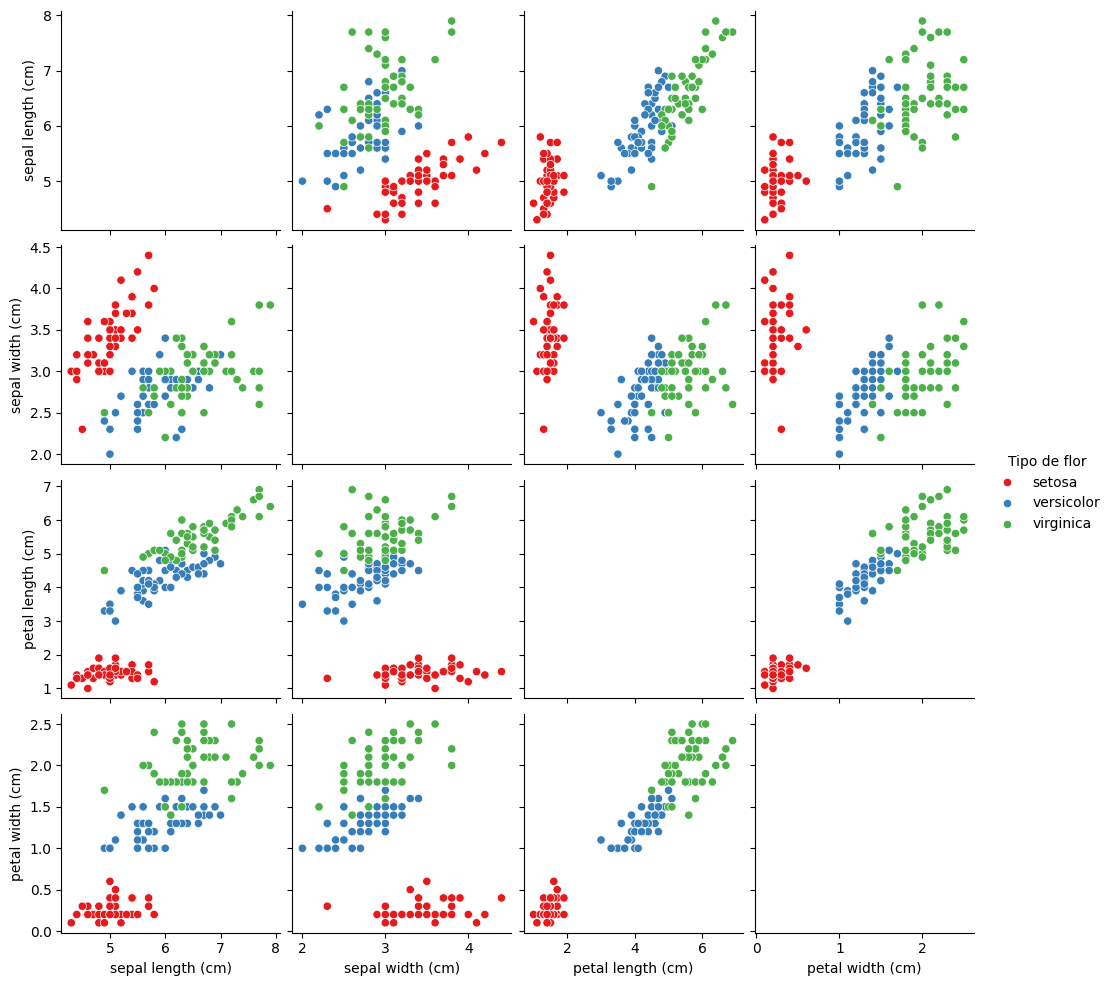

In [7]:
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Creamos un DataFrame para facilitar la visualización
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['Tipo de flor'] = y
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['Tipo de flor'] = iris_df['Tipo de flor'].map(species_names)

# Generamos gráficas de dispersión para cada par de atributos
g = sns.pairplot(iris_df, hue='Tipo de flor', palette='Set1', diag_kind='None')

plt.show()

Debido a la relación observada entre cada par de variables dentro del dataset, se determina que el par más adecuado para la clasificación es el de "petal length" (longitud del pétalo) con "petal width" (anchura del pétalo). Esta selección se basa en varias consideraciones: la combinación de "petal length" y "petal width" muestra una distinción más notoria entre las tres clases de flores (setosa, versicolor y virginica) en comparación con otros pares de variables, lo que significa que estas dos características tienen la capacidad de separar eficazmente las diferentes clases de flores en el espacio de características. 

Además, al observar los valores de las características dentro de cada clase, se nota que "petal length" y "petal width" exhiben patrones de comportamiento más similares dentro de una misma clase, lo que los hace más consistentes y distintivos para cada tipo de flor

In [8]:
# Cargamos el conjunto de datos de iris
X = iris.data[:,(2,3)]  # Tomamos los dos atributos con mayor relevancia para la clasificación
y = np.where(iris.target != 0, 1, -1)  # Convertimos las etiquetas a +1 y -1

In [9]:
# Entrenamos el perceptrón
weights, results_df = train_perceptron(X, y, learning_rate, threshold)

## Cuestión 2

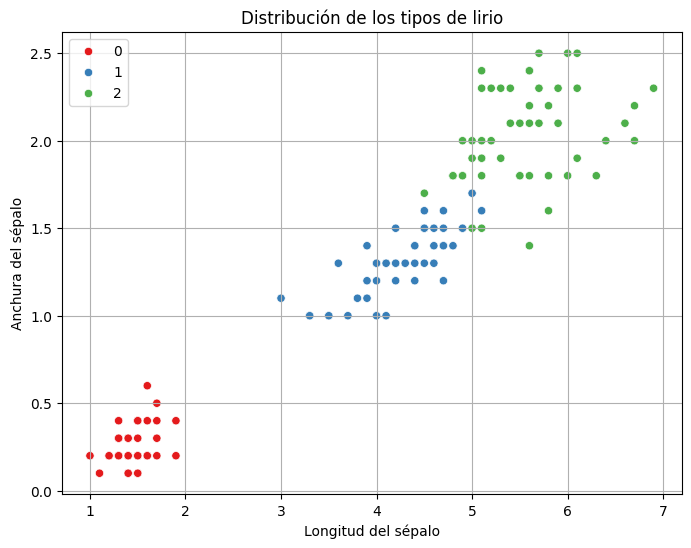

In [10]:
# Graficamos la distribución de los tipos de lirio
plot_iris_data(X, iris.target)

In [11]:
print("Bias(𝜃) del perceptrón:", weights[0]," |  Pesos: ", weights[1:])

Bias(𝜃) del perceptrón: -0.7747088653562013  |  Pesos:  [0.13419873 0.55114404]


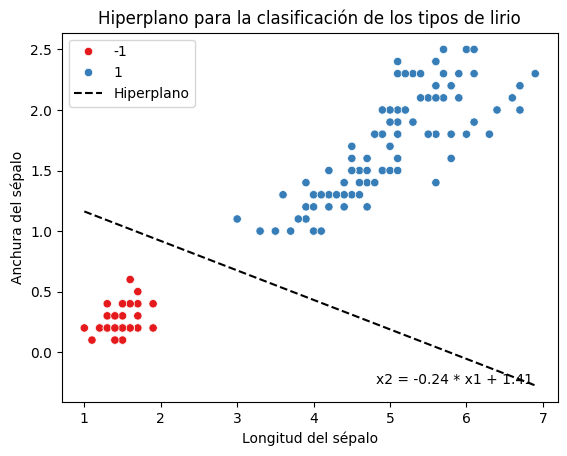

In [12]:
# Graficamos el hiperplano resultante
plot_hyperplane(X, y, weights)

In [13]:
# Mostramos los resultados del entrenamiento
print(results_df)

   Iteración                                                  X  \
0          1  [[1.4, 0.2], [1.4, 0.2], [1.3, 0.2], [1.5, 0.2...   
1          2  [[1.4, 0.2], [1.4, 0.2], [1.3, 0.2], [1.5, 0.2...   
2          3  [[1.4, 0.2], [1.4, 0.2], [1.3, 0.2], [1.5, 0.2...   
3          4  [[1.4, 0.2], [1.4, 0.2], [1.3, 0.2], [1.5, 0.2...   

                                       Pesos finales  
0  [0.025291134643798785, 0.6541987335440805, 0.5...  
1  [-0.37470886535620124, 0.6941987335440807, 0.6...  
2  [-0.7747088653562013, 0.13419873354408074, 0.5...  
3  [-0.7747088653562013, 0.13419873354408074, 0.5...  


## Cuestión 3

In [14]:
# Entrenamiento del perceptrón con 3 atributos
X_3_attributes = iris.data[:, [0, 1, 2]]  # Tomamos los primeros tres atributos
weights_3_attributes, results_df_3_attributes = train_perceptron(X_3_attributes, y)

# Entrenamiento del perceptrón con 4 atributos
X_4_attributes = iris.data[:, [0, 1, 2, 3]]  # Tomamos todos los atributos
weights_4_attributes, results_df_4_attributes = train_perceptron(X_4_attributes, y)

print("Bias(𝜃) perceptrón de 3 atributos:", weights_3_attributes[0]," |  Pesos: ", weights_3_attributes[1:])
print("Bias(𝜃) perceptrón de 4 atributos:", weights_4_attributes[0]," |  Pesos: ", weights_4_attributes[1:])

Bias(𝜃) perceptrón de 3 atributos: 0.7879034916894605  |  Pesos:  [-0.09867487 -0.99832076  0.99929231]
Bias(𝜃) perceptrón de 4 atributos: -0.7456378694299055  |  Pesos:  [-0.02688864 -0.42453131  0.68416034  0.25534664]


In [15]:
# Calcular la precisión para el perceptrón con 3 atributos
y_pred_3_attributes = np.sign(np.dot(np.hstack((np.ones((X_3_attributes.shape[0], 1)), X_3_attributes)), weights_3_attributes))
accuracy_3_attributes = np.mean(y_pred_3_attributes == y)
print("Precisión del perceptrón con 3 atributos:" , accuracy_3_attributes*100, "%")

# Calcular la precisión para el perceptrón con 4 atributos
y_pred_4_attributes = np.sign(np.dot(np.hstack((np.ones((X_4_attributes.shape[0], 1)), X_4_attributes)), weights_4_attributes))
accuracy_4_attributes = np.mean(y_pred_4_attributes == y)
print("Precisión del perceptrón con 4 atributos:" , accuracy_4_attributes*100, "%")


Precisión del perceptrón con 3 atributos: 100.0 %
Precisión del perceptrón con 4 atributos: 100.0 %


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea434ecd-36a0-459f-990c-20e74b84c244' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>